In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('okt.csv',index_col='Unnamed: 0')
data.head()

,제목,본문,통합 분류1,본문정리morphs,본문정리nouns,본문정리pos,숫자카테고리
0,한국학중앙연구원 새 이사장 유홍준 교수,한국학중앙연구원 원장 안병우 은 지난 25일 이사회를 열고 새 이사장으로 유홍준 7...,문화,"['한', '국학', '중앙', '연구원', '원장', '안병', '우', '은',...","['국학', '중앙', '연구원', '원장', '안병', '은', '지난', '이사...","['국학', '중앙', '연구원', '원장', '안병', '은', '지난', '이사...",3
1,“통일 후 대만인 연봉 86만 원 올리기는 식은 죽 먹기”...中 장밋빛 미래 제시,중국 당국이 통일 후 대만인의 평균 연봉을 2만 대만 달러 약 86만 원 이상 인...,정치,"['중국', '당국', '이', '통일', '후', '대만인', '의', '평균',...","['중국', '당국', '통일', '후', '대만인', '평균', '연봉', '대만...","['중국', '당국', '통일', '후', '대만인', '평균', '연봉', '대만...",6
2,올 수능 작년보다 어려웠다,문 이과 첫 통합으로 치러진 2022학년도 대학수학능력시험 수능 은 전반적으로 지난...,사회,"['문', '이과', '첫', '통합', '으로', '치러지다', '2022', '...","['문', '이과', '첫', '통합', '학년', '대학', '수학', '능력',...","['문', '이과', '첫', '통합', '학년', '대학', '수학', '능력',...",4
3,‘10대 최강자’ 김주형 “이루고 싶은 것 다 이뤘다 다시 美 도전”,헤럴드경제 파주 조범자 기자 이루고 싶은 목표를 다 이뤘다 다시 준비 잘 ...,스포츠,"['헤럴드경제', '파주', '조', '범자', '기자', '이루다', '싶다', ...","['헤럴드경제', '파주', '범자', '기자', '목표', '다시', '준비', ...","['헤럴드경제', '파주', '범자', '기자', '목표', '다시', '준비', ...",5
4,"축구 국가대표 황희찬, 모교 포철고에 3000만원 기부",축구 국가대표 공격수 황희찬 선수가 15일 모교인 경북 포항제철고교 이하 포철고 에...,스포츠,"['축구', '국가대표', '공격수', '황희', '찬', '선수', '가', '1...","['축구', '국가대표', '공격수', '황희', '찬', '선수', '모교', '...","['축구', '국가대표', '공격수', '황희', '찬', '선수', '모교', '...",5


In [4]:
data['본문'][4]

'축구 국가대표 공격수 황희찬 선수가 15일 모교인 경북 포항제철고교 이하 포철고 에 발전기금 3000만원을 기탁했다     15일 포스코교육재단에 따르면  이날 오전 포스코교육재단 산하 포철고 역사관에서 황희찬 선수를 대신해 아버지 황원경씨가 포철고에 발전기금 3000만원을 전달했다     황원경씨는  아들을 우수한 선수로 육성해 준 포철고에 감사한 마  '

In [5]:
data=data.head(1)

In [6]:
data

,제목,본문,통합 분류1,본문정리morphs,본문정리nouns,본문정리pos,숫자카테고리
0,한국학중앙연구원 새 이사장 유홍준 교수,한국학중앙연구원 원장 안병우 은 지난 25일 이사회를 열고 새 이사장으로 유홍준 7...,문화,"['한', '국학', '중앙', '연구원', '원장', '안병', '우', '은',...","['국학', '중앙', '연구원', '원장', '안병', '은', '지난', '이사...","['국학', '중앙', '연구원', '원장', '안병', '은', '지난', '이사...",3


In [7]:
data['본문'][0]

'한국학중앙연구원 원장 안병우 은 지난 25일 이사회를 열고 새 이사장으로 유홍준 72  명지대 석좌교수를 선임했다고 29일 밝혔다  미술사학자인 유 신임 이사장은 베스트셀러  나의 문화유산답사기  지은이로 잘 알려져 있으며  노무현 정부 시절인 2004 2008년 문화재청장을 지낸 바 있다  지난 2018년부터 한국학중앙연구원 이사로 재임해왔다  이사장  '

In [8]:
l=[]
l.append(data['본문'][0])
d={}
d['본문']=l
z=pd.DataFrame.from_dict(d)
z

,본문
0,한국학중앙연구원 원장 안병우 은 지난 25일 이사회를 열고 새 이사장으로 유홍준 7...


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [10]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(data['본문'])

In [11]:
word2id = defaultdict(lambda : 0)
for idx, feature in enumerate(vectorizer.get_feature_names_out()):
    word2id[feature] = idx
l=[]
for i, sent in enumerate(data['본문']):
    print('====== document[%d] ======' % i)
    l.append([ (token, matrix[i, word2id[token]]) for token in sent.split() ] )

====== document[0] ======


In [12]:

print(l)


[[('한국학중앙연구원', 0.3086066999241838), ('원장', 0.1543033499620919), ('안병우', 0.1543033499620919), ('은', 0.1543033499620919), ('지난', 0.3086066999241838), ('25일', 0.1543033499620919), ('이사회를', 0.1543033499620919), ('열고', 0.1543033499620919), ('새', 0.1543033499620919), ('이사장으로', 0.1543033499620919), ('유홍준', 0.1543033499620919), ('72', 0.1543033499620919), ('명지대', 0.1543033499620919), ('석좌교수를', 0.1543033499620919), ('선임했다고', 0.1543033499620919), ('29일', 0.1543033499620919), ('밝혔다', 0.1543033499620919), ('미술사학자인', 0.1543033499620919), ('유', 0.1543033499620919), ('신임', 0.1543033499620919), ('이사장은', 0.1543033499620919), ('베스트셀러', 0.1543033499620919), ('나의', 0.1543033499620919), ('문화유산답사기', 0.1543033499620919), ('지은이로', 0.1543033499620919), ('잘', 0.1543033499620919), ('알려져', 0.1543033499620919), ('있으며', 0.1543033499620919), ('노무현', 0.1543033499620919), ('정부', 0.1543033499620919), ('시절인', 0.1543033499620919), ('2004', 0.1543033499620919), ('2008년', 0.1543033499620919), ('문화재청장을', 0.1543033499620919)

In [13]:
dic={}

dic['tf-idf']=l

In [14]:
dic=pd.DataFrame.from_dict(dic)

In [15]:
dic['tf-idf'][0]

[('한국학중앙연구원', 0.3086066999241838),
 ('원장', 0.1543033499620919),
 ('안병우', 0.1543033499620919),
 ('은', 0.1543033499620919),
 ('지난', 0.3086066999241838),
 ('25일', 0.1543033499620919),
 ('이사회를', 0.1543033499620919),
 ('열고', 0.1543033499620919),
 ('새', 0.1543033499620919),
 ('이사장으로', 0.1543033499620919),
 ('유홍준', 0.1543033499620919),
 ('72', 0.1543033499620919),
 ('명지대', 0.1543033499620919),
 ('석좌교수를', 0.1543033499620919),
 ('선임했다고', 0.1543033499620919),
 ('29일', 0.1543033499620919),
 ('밝혔다', 0.1543033499620919),
 ('미술사학자인', 0.1543033499620919),
 ('유', 0.1543033499620919),
 ('신임', 0.1543033499620919),
 ('이사장은', 0.1543033499620919),
 ('베스트셀러', 0.1543033499620919),
 ('나의', 0.1543033499620919),
 ('문화유산답사기', 0.1543033499620919),
 ('지은이로', 0.1543033499620919),
 ('잘', 0.1543033499620919),
 ('알려져', 0.1543033499620919),
 ('있으며', 0.1543033499620919),
 ('노무현', 0.1543033499620919),
 ('정부', 0.1543033499620919),
 ('시절인', 0.1543033499620919),
 ('2004', 0.1543033499620919),
 ('2008년', 0.1543033499620919),

In [16]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import platform 
if platform.system() == 'Darwin': #맥
    wordcloud=WordCloud(font_path="AppleGothic",width=800,height=800,background_color='white',max_font_size=2000)
elif platform.system() == 'Windows': #윈도우
    wordcloud=WordCloud(font_path="Malgun Gothic",width=800,height=800,background_color='white',max_font_size=2000)
    
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
    wordcloud=WordCloud(font_path="Malgun Gothic",width=800,height=800,background_color='white',max_font_size=2000)


In [17]:
wordcloud.generate_from_frequencies(dict(dic['tf-idf'][0]))
# wordcloud.to_file('word.jpg')

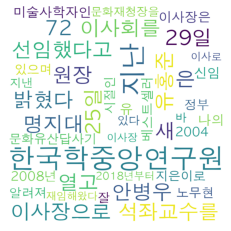

In [19]:
plt.axis('off')
plt.imshow(wordcloud)
plt.show()



In [16]:
vectorizer.vocabulary_

{'한국학중앙연구원': 35,
 '원장': 21,
 '안병우': 18,
 '지난': 32,
 '25일': 3,
 '이사회를': 27,
 '열고': 20,
 '이사장으로': 25,
 '유홍준': 22,
 '72': 5,
 '명지대': 8,
 '석좌교수를': 14,
 '선임했다고': 15,
 '29일': 4,
 '밝혔다': 12,
 '미술사학자인': 11,
 '신임': 17,
 '이사장은': 26,
 '베스트셀러': 13,
 '나의': 6,
 '문화유산답사기': 9,
 '지은이로': 34,
 '알려져': 19,
 '있으며': 29,
 '노무현': 7,
 '정부': 31,
 '시절인': 16,
 '2004': 0,
 '2008년': 1,
 '문화재청장을': 10,
 '지낸': 33,
 '있다': 28,
 '2018년부터': 2,
 '이사로': 23,
 '재임해왔다': 30,
 '이사장': 24}

In [17]:
sorted(vectorizer.vocabulary_.items())



[('2004', 0),
 ('2008년', 1),
 ('2018년부터', 2),
 ('25일', 3),
 ('29일', 4),
 ('72', 5),
 ('나의', 6),
 ('노무현', 7),
 ('명지대', 8),
 ('문화유산답사기', 9),
 ('문화재청장을', 10),
 ('미술사학자인', 11),
 ('밝혔다', 12),
 ('베스트셀러', 13),
 ('석좌교수를', 14),
 ('선임했다고', 15),
 ('시절인', 16),
 ('신임', 17),
 ('안병우', 18),
 ('알려져', 19),
 ('열고', 20),
 ('원장', 21),
 ('유홍준', 22),
 ('이사로', 23),
 ('이사장', 24),
 ('이사장으로', 25),
 ('이사장은', 26),
 ('이사회를', 27),
 ('있다', 28),
 ('있으며', 29),
 ('재임해왔다', 30),
 ('정부', 31),
 ('지난', 32),
 ('지낸', 33),
 ('지은이로', 34),
 ('한국학중앙연구원', 35)]

In [18]:
a='''경상북도 2025년까지 '듀얼 라이프 프로젝트' 추진…1가구 2주택, 농막 제한 등 현실적 제약 많아경상북도가 도시와 농촌의 공존을 지향하며 '듀얼 라이프 프로젝트'를 추진, 전원생활을 꿈꾸는 이들의 관심을 끌고 있다. 사진은 팔공산 전원주택 모습. 매일신문 DB건설 엔지니어링 업체를 운영하는 50대 후반의 A 씨는 도시에서 일하고 농촌 전원주택에서 생활하며 바닷가 주택에서 힐링한다.울릉도 출신인 그는 2년 전 경북 경산의 도심 아파트에서 탈출했다. 회사에서 차로 20분 거리의 면 소재지에 자리 잡은 전원주택 단지로 이사했다. 앞서 그는 고향의 향수를 그리며 포항 구룡포의 바닷가 빈집을 매입해 리모델링했다. 30여 가구로 구성한 그의 전원주택 단지는 예전 부자들의 별장으로 주로 사용되었으나 요즘에는 매일 거주하는 형태로 변하고 있다. 구룡포에는 낚시와 레저를 겸한 조그만 배를 두고 있다.A 씨 주위 사람들은 부러운 시선으로 그를 바라본다. 일하면서도 여가를 즐기는 그의 모습을 지켜보고 어울리는 것 자체가 힐링이다.대구에 사는 60대 중반의 B 씨 부부는 은퇴 후 집에서 30분 거리 농촌 마을의 한적한 곳에 농막이 딸린 600㎡가량의 땅을 구매했다. 오랜 기간 교사로 맞벌이를 한 부부가 공기 좋은 곳에서 손자들과 함께 떠들며 뛰어놀 공간을 마련한 것이다. B 씨는 "남에게 피해를 주지 않고 음식을 해먹을 수 있으며 텃밭을 가꾸는 재미도 있다"고 했다.많은 도시인이 전원생활을 꿈꾸며 실현하고 있다. 들여다보면 전원생활은 예전 농촌 정착형에서 도시와 농촌 공존형으로 바뀌는 추세다. 도시에서 최대한 오랜 기간 일하며 농촌에서 힐링을 꾀하고 있다. 도시에서 의료와 문화 등 문명의 이기를 최대한 누리는 것을 전제로 농촌에서 전원생활을 하기를 바란다. 농촌 지역의 경치 좋은 곳으로 완전히 이주한 이들의 정착 실패 경험담이 많이 알려졌기 때문일 것이다. 큼지막하고 호화롭게 지은 전원주택은 애물단지로 전락한 상태다. 실속 있는 농막형이 대세다.경상북도가 인구 유출에 따른 지방소멸 문제 해결책으로 '두 지역 살기 프로젝트'를 발표했는데, 전원생활을 꿈꾸는 이들의 관심을 끌고 있다. 경북도는 지난달 30일 도시와 지방 간 연결을 통해 유동인구를 늘리는 데 초점을 맞춘 '경북형 듀얼 라이프(Dual Life) 기본계획'을 발표했다. 인구가 밀집한 수도권과 경북의 상생을 꾀하고 있다.듀얼 라이프는 지역과 특별한 관계를 맺고 거점을 마련해 중장기적·정기적·반복적으로 순환 거주하는 두 지역 살기를 뜻한다. 지방의 인력 부족 해소·커뮤니티 활성화·유휴공간 활용·지역경제 활성화 등을 추구한다. 이 프로젝트의 비전은 수도권 인구를 경북으로 유치하는 게 아니라 연결을 통해 '건강할 때 두 지역 생활을 하자'는데 있다. 경북도가 '은퇴자뿐만 아니라 젊은 활동 인구가 모이는 열린 경북'을 지향하며 큰 그림을 그린 것으로 볼 수 있다.기본계획에 따르면 듀얼 라이프 모델은 생산일자리형, 휴양거주형, 교육연수형, 여가체험형, 해외유입형 등 5가지다.생산일자리형은 기업 유치를 통한 일자리 창출, 공공·민간기관의 새로운 근무형태에 따른 인구 유입으로 정주 인구를 확보하는 모델이다. 휴양거주형은 출향인 유입, 정기적 국내·외 방문객 유치로 체류 인구를 확보하는 모델이다. 교육연수형도 공공·민간 기관의 교육·연수생 모집·방문으로 체류 인구를 확보한다. 여가체험형과 해외유입형은 경북도와 지속해서 관계를 맺고 지역에 도움을 줄 수 있는 인구를 확보하는 '관계인구 확보'에 중점을 뒀다.경북도는 1단계로 2022년 듀얼 라이프 종합플랫폼을 구축하고 민관추진협의체를 구성해 운영하며 시·군별 핵심사업(46개)과 공모 사업을 추진한다. 2단계에서는 2023년까지 듀얼 라이프 대중화 운동, 프로그램 개발·운영, 중·장기사업 기본구상과 예산 확보, 국가 시범 사업화, 국비 확보 등을 계획하고 있다. 3단계에서는 2025년까지 완료된 사업을 평가하고 추진 체계를 전국으로 확산하며 지속화를 위한 행정·제도적 지원 체계를 구축한다.상주시와 한국토지주택공사가 공검면 폐교부지를 활용해 추진 중인 귀농·귀촌용 공공주택 사업 조감도. 상주시 제공시·군별 핵심사업으로 경주시는 관광형 치유 작은 정원 조성(휴양거주형)과 체류형 자연농장 운영(여가체험형)을, 포항시는 3·4세대 방사광가속기, 포항공대, 가속기 전문인력 등과 연계한 사업(교육연수형)을 각각 추진한다. 구미시는 산업단지, 외국인 근로자 등과 연계한 사업(생산일자리형)을, 경산시는 지식산업지구 등을 활용, 해외 쇼핑객 유치 등을 위한 '월드 프리미엄 아울렛' 조성(해외유입형)을 구상 중이다.영주시는 귀농 교육, 농업 창업 등을 통해 소백산 귀농드림타운(생산일자리형)을, 상주시는 폐교부지를 활용한 귀농·귀촌 체험형 작은 정원 조성(여가체험형)을, 문경시는 명상과 힐링을 키워드로 '세계 명상마을' 조성을 각각 추진한다.듀얼 라이프 기본계획 수립 과정에서 시행한 전국민 인식 조사(경북도민 제외 만 19세 이상 610명 응답, 지난 4월 5~14일)에 따르면 국민 10명 중 7명은 두 지역에서 살기를 바라고 있다. 이 조사에서 응답자의 13.3%는 이미 두 지역 살기를 실행하고 있으며 53.6%는 앞으로 희망하는 것으로 나타났다. 전체의 66.9%가 두 지역 살기에 긍정적인 응답을 한 것이다.연령대별로는 50대에서 76.0%로 긍정적인 반응이 가장 높았고 40대가 72.2%, 30대 69.9%로 뒤를 이었다. 60대 이상은 59.2%, 20대는 56.7%가 두 지역 살기를 희망했다. 두 지역 살기 선호 지역으로는 경북도 23개 시·군 중 안동이 가장 높았다. 20~30대는 문경과 예천, 50~60대는 울릉, 청송, 울진을 상대적으로 선호했다.듀얼 라이프는 많은 국민이 꿈꾸는 일이다. 1주일에 4, 5일은 본 거주지에서 일하고 주말에 제2의 다른 지역에서 살기를 바라는 것이다. 경북도가 추진하는 '듀얼 라이프 운동'이 1970년대 새마을 운동처럼 확산, 인구 감소에 따른 지방소멸 문제가 해결되기를 바라지만 현실적으론 상당한 제약이 있다.두 지역 살기를 위해서는 법적, 제도적 정비가 뒤따라야 하고 소득 수준과 노동 환경도 뒷받침되어야 한다.도시와 농촌에서 공존하는 A, B 씨는 제2 정착지에 따른 고충을 토로하고 있다. A 씨는 투기 목적으로 여러 곳에 집을 마련한 게 아니지만 1가구 다주택 규제로 신음하고 있다. 기존에 살던 아파트를 처분하지 않고 전세로 두고 있기에 졸지에 1가구 3주택자가 된 상태다. B 씨는 농지 매입 과정에서 농막이 불법 건물 판정을 받아 애를 먹었다. 기존 농막에 설치된 데크와 창고를 뜯어내고 새로 대지 전용 허가를 받아 터전을 마련했다. 이를 위해 그는 관공서의 5, 6개 부서를 찾아다녀야 했고 농지 외 추가 비용을 많이 들였다.이런 제약이 아니더라도 두 지역 살기에 나설 만큼 경제적으로 안정되고 시간 여유가 있는 이들은 많지 않다. 희망을 품고 두 지역 살기에 나선 이들도 가족 외면과 약한 의지 때문에 오래 버티지 못한다. 경북도의 듀얼 라이프 프로젝트가 성공하려면 각 모델에 따른 다양한 인센티브와 세심한 배려가 필요하다.'''

In [31]:
from gensim.summarization.summarizer import summarize


In [29]:
a='''민주당 이재명 대선 후보는 '대장동 의혹' 특검 도입과 관련해, "국민의힘 윤석열 후보 본인 혐의가 드러난 부분을 빼고 하자는 엉뚱한 주장으로 이 문제가 앞으로 진척이 못 되고 있다"고 말했습니다.
이 후보는 오전 경북 칠곡 다부동 전적기념관을 방문한 자리에서, "처음부터 끝까지 성역 없이 수사하는 특검이 반드시 필요하다"며 이같이 강조했습니다.
이 후보는 "자꾸 나에게 불리한 것 빼고 상대방에게 정치적으로 불리한 것만 하자는 것은 결국 하지 말라는 것 아닌가"라고, "윤 후보 관계된 부분만 빼고 하자? 이게 말이 안 되지 않느냐"라고 반문했습니다.
그러면서, "돈을 최초 조달할 때 대출 비리를 알고도 덮었다는 혐의가 있는데 당연히 수사해야 한다"라며, "그때 그거 덮지 않고 제대로 처벌하지 않고 환수했다면 이 일은 아예 벌어지지 않았을 것"이라고 지적했습니다.
아울러, "개발이익을 특정인이 과도하게 치부하는 소위 하나은행 중심의 배당설계, 당연히 조사해야 한다"라며, "국민의힘이 왜 한국토지주택공사에 공공개발을 포기시키고 성남시 공공개발을 막아서 100% 민간개발업체에 봐주자고 강압했는지도 조사해야 한다"고 덧붙였습니다.
유한기 전 성남도시개발공사 개발사업본부장의 사망에 대해선, "검찰이 본질은 남겨두고 주변을 뒤지는 수사를 하다가 결국은 누군가가 또 검찰의 강압수사를 원망하면서 극단적 선택을 하게 됐다고 한다"며, "몸통을, 본질을 철저하게 수사해야 한다"고 말했습니다.그러면서, "신속하게 여야 간 합의를 해서 특검을 통한 수사가 합의되기를 다시 한번 촉구한다"고 강조했습니다.(사진=연합뉴스)'''

In [10]:
a='''민주당 이재명 대선 후보는 '대장동 의혹' 특검 도입과 관련해, "국민의힘 윤석열 후보 본인 혐의가 드러난 부분을 빼고 하자는 엉뚱한 주장으로 이 문제가 앞으로 진척이 못 되고 있다"고 말했습니다.

이 후보는 오전 경북 칠곡 다부동 전적기념관을 방문한 자리에서, "처음부터 끝까지 성역 없이 수사하는 특검이 반드시 필요하다"며 이같이 강조했습니다.

이 후보는 "자꾸 나에게 불리한 것 빼고 상대방에게 정치적으로 불리한 것만 하자는 것은 결국 하지 말라는 것 아닌가"라고, "윤 후보 관계된 부분만 빼고 하자? 이게 말이 안 되지 않느냐"라고 반문했습니다.

그러면서, "돈을 최초 조달할 때 대출 비리를 알고도 덮었다는 혐의가 있는데 당연히 수사해야 한다"라며, "그때 그거 덮지 않고 제대로 처벌하지 않고 환수했다면 이 일은 아예 벌어지지 않았을 것"이라고 지적했습니다.

아울러, "개발이익을 특정인이 과도하게 치부하는 소위 하나은행 중심의 배당설계, 당연히 조사해야 한다"라며, "국민의힘이 왜 한국토지주택공사에 공공개발을 포기시키고 성남시 공공개발을 막아서 100% 민간개발업체에 봐주자고 강압했는지도 조사해야 한다"고 덧붙였습니다.

유한기 전 성남도시개발공사 개발사업본부장의 사망에 대해선, "검찰이 본질은 남겨두고 주변을 뒤지는 수사를 하다가 결국은 누군가가 또 검찰의 강압수사를 원망하면서 극단적 선택을 하게 됐다고 한다"며, "몸통을, 본질을 철저하게 수사해야 한다"고 말했습니다.

그러면서, "신속하게 여야 간 합의를 해서 특검을 통한 수사가 합의되기를 다시 한번 촉구한다"고 강조했습니다.

(사진=연합뉴스)'''

In [32]:
short=summarize(a,word_count=100)
short

'민주당 이재명 대선 후보는 \'대장동 의혹\' 특검 도입과 관련해, "국민의힘 윤석열 후보 본인 혐의가 드러난 부분을 빼고 하자는 엉뚱한 주장으로 이 문제가 앞으로 진척이 못 되고 있다"고 말했습니다.\n그러면서, "돈을 최초 조달할 때 대출 비리를 알고도 덮었다는 혐의가 있는데 당연히 수사해야 한다"라며, "그때 그거 덮지 않고 제대로 처벌하지 않고 환수했다면 이 일은 아예 벌어지지 않았을 것"이라고 지적했습니다.\n유한기 전 성남도시개발공사 개발사업본부장의 사망에 대해선, "검찰이 본질은 남겨두고 주변을 뒤지는 수사를 하다가 결국은 누군가가 또 검찰의 강압수사를 원망하면서 극단적 선택을 하게 됐다고 한다"며, "몸통을, 본질을 철저하게 수사해야 한다"고 말했습니다.그러면서, "신속하게 여야 간 합의를 해서 특검을 통한 수사가 합의되기를 다시 한번 촉구한다"고 강조했습니다.(사진=연합뉴스)'